In [1]:
import os
import scipy.io as sio
import scipy.stats as stats
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import shutil

In [11]:
#Insert paht for dataset and labels
DATA_PATH=r'dataset/C_filtered_data'
LABELS_PATH=r'dataset/voti.xlsx'

In [12]:
#list all the available matrices
matrices=os.listdir(DATA_PATH)

In [13]:
#read the labels
labels=pd.read_excel(LABELS_PATH,usecols=[0], header=None)

In [14]:
#Function to convert matlab matrices in dataframe, easier to handle

def matToDf(mat_file_path, matrix_variable_name='C_matrix'):
    """
    Reads a MATLAB .mat file, extracts a specified matrix, and converts it
    into a pandas DataFrame.

    Args:
        mat_file_path (str): The full path to the MATLAB .mat file.
        matrix_variable_name (str): The name of the matrix variable within
                                     the .mat file that you want to load.

    Returns:
        pandas.DataFrame: A pandas DataFrame containing the data from the
                          MATLAB matrix. Returns None if the file is not found
                          or the variable is not present.
    """
    try:
        mat_data = sio.loadmat(mat_file_path)
        matrix = mat_data[matrix_variable_name]
        df = pd.DataFrame(matrix)
        return df
    except FileNotFoundError:
        print(f"Error: File not found at '{mat_file_path}'.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [17]:
#Coversion of matrices to xlsx files
FINAL_FOLDER=r'dataset/converted_data'
for m in matrices:
    df=matToDf(os.path.join(DATA_PATH,m))
    #remove first row , Cz electrode, and reorder them, following C1,C2,C3,C4,C5,C6
    df=df.drop(0).reindex([3,4,1,6,2,5])
    df=df.reset_index(drop=True)
    filename,extension=os.path.splitext(m)
    df.to_excel(os.path.join(FINAL_FOLDER,filename+".xlsx"))

# Data acquisition

In [18]:
DATA_PATH=r'dataset/converted_data'
LABELS_PATH=r'dataset/voti.xlsx'

In [19]:
matrices=os.listdir(DATA_PATH)
labels=pd.read_excel(LABELS_PATH,usecols=[0], header=None)

In [20]:
#count the number of matrices for each tiredness level
labels[0].value_counts()

0
0     120
5      77
3      58
6      57
4      54
7      32
2      25
8      24
1      19
9      10
10      4
Name: count, dtype: int64

In [21]:
import re

#function used to correctly sort the files listed using os.listdir()
#in order to match the order of the labels

def custom_sort_key(s):
    """
    Extracts the numerical parts from the string for sorting.
    Returns a list of alternating strings and integers.
    """
    parts = re.split(r'(\d+)', s)
    return [int(part) if part.isdigit() else part.lower() for part in parts]

sorted_matrices = sorted(matrices, key=custom_sort_key)

for item in sorted_matrices:
    print(item)

C_Arithmetic_sub_1_trial1.xlsx
C_Arithmetic_sub_1_trial2.xlsx
C_Arithmetic_sub_1_trial3.xlsx
C_Arithmetic_sub_2_trial1.xlsx
C_Arithmetic_sub_2_trial2.xlsx
C_Arithmetic_sub_2_trial3.xlsx
C_Arithmetic_sub_3_trial1.xlsx
C_Arithmetic_sub_3_trial2.xlsx
C_Arithmetic_sub_3_trial3.xlsx
C_Arithmetic_sub_4_trial1.xlsx
C_Arithmetic_sub_4_trial2.xlsx
C_Arithmetic_sub_4_trial3.xlsx
C_Arithmetic_sub_5_trial1.xlsx
C_Arithmetic_sub_5_trial2.xlsx
C_Arithmetic_sub_5_trial3.xlsx
C_Arithmetic_sub_6_trial1.xlsx
C_Arithmetic_sub_6_trial2.xlsx
C_Arithmetic_sub_6_trial3.xlsx
C_Arithmetic_sub_7_trial1.xlsx
C_Arithmetic_sub_7_trial2.xlsx
C_Arithmetic_sub_7_trial3.xlsx
C_Arithmetic_sub_8_trial1.xlsx
C_Arithmetic_sub_8_trial2.xlsx
C_Arithmetic_sub_8_trial3.xlsx
C_Arithmetic_sub_9_trial1.xlsx
C_Arithmetic_sub_9_trial2.xlsx
C_Arithmetic_sub_9_trial3.xlsx
C_Arithmetic_sub_10_trial1.xlsx
C_Arithmetic_sub_10_trial2.xlsx
C_Arithmetic_sub_10_trial3.xlsx
C_Arithmetic_sub_11_trial1.xlsx
C_Arithmetic_sub_11_trial2.xlsx
C_A

In [22]:
import copy

#creation of a dataset, using a different tiredness rating system

#data structure is an array of ranges, modify the ranges to create a dataset splitted accordingly

new_labels=copy.deepcopy(labels)

# ranges is a list of lists, the number of list will represent the possible ratings 
# the values in each list will be merged in the same value

ranges=[[0,1] , [2,3,4] , [5,6] , [7,8,9,10]]

for idx,l in enumerate(new_labels[0],0):
    for ridx,r in enumerate(ranges,0):
        if l in r:
            print(f'Converting {l} in {ridx}')
            new_labels.loc[idx,0]=ridx

Converting 6 in 2
Converting 7 in 3
Converting 4 in 1
Converting 3 in 1
Converting 3 in 1
Converting 7 in 3
Converting 5 in 2
Converting 3 in 1
Converting 8 in 3
Converting 5 in 2
Converting 3 in 1
Converting 7 in 3
Converting 6 in 2
Converting 5 in 2
Converting 5 in 2
Converting 5 in 2
Converting 4 in 1
Converting 8 in 3
Converting 5 in 2
Converting 3 in 1
Converting 6 in 2
Converting 3 in 1
Converting 6 in 2
Converting 5 in 2
Converting 3 in 1
Converting 4 in 1
Converting 7 in 3
Converting 3 in 1
Converting 4 in 1
Converting 6 in 2
Converting 7 in 3
Converting 6 in 2
Converting 5 in 2
Converting 5 in 2
Converting 5 in 2
Converting 8 in 3
Converting 3 in 1
Converting 3 in 1
Converting 3 in 1
Converting 3 in 1
Converting 6 in 2
Converting 6 in 2
Converting 9 in 3
Converting 7 in 3
Converting 6 in 2
Converting 4 in 1
Converting 5 in 2
Converting 8 in 3
Converting 8 in 3
Converting 6 in 2
Converting 7 in 3
Converting 6 in 2
Converting 5 in 2
Converting 9 in 3
Converting 4 in 1
Converting

In [23]:
#counts the new value
new_labels.value_counts()

0
0    139
1    137
2    134
3     70
Name: count, dtype: int64

In [24]:
#create the destination folder for the new data

FOLDS_FOLDER=r'dataset_folds_ol'

if not os.path.exists(FOLDS_FOLDER):
    os.mkdir(FOLDS_FOLDER)


#create the new label file, with different structure, each row contains the matrix file and the tiredness level
new_labels.insert(0,"matrix","None")
for idx,m in enumerate(sorted_matrices,0):
    new_labels.loc[idx,"matrix"]=m
new_labels=new_labels.rename(columns={0:"TL"})

In [25]:
#save new labels file
new_labels.to_csv(os.path.join(FOLDS_FOLDER,"TL.csv"),index=False,sep=',')

In [26]:
new_labels

,matrix,TL
0,C_Arithmetic_sub_1_trial1.xlsx,2
1,C_Arithmetic_sub_1_trial2.xlsx,3
2,C_Arithmetic_sub_1_trial3.xlsx,1
3,C_Arithmetic_sub_2_trial1.xlsx,1
4,C_Arithmetic_sub_2_trial2.xlsx,1
...,...,...
475,C_Stroop_sub_39_trial2.xlsx,1
476,C_Stroop_sub_39_trial3.xlsx,2
477,C_Stroop_sub_40_trial1.xlsx,2
478,C_Stroop_sub_40_trial2.xlsx,2


In [27]:
#Subsampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(new_labels["matrix"].to_frame(),new_labels["TL"])

In [28]:
y_res.value_counts()

TL
0    70
1    70
2    70
3    70
Name: count, dtype: int64

In [29]:
undersampled_labels=pd.DataFrame(columns=["matrix","TL"])

In [30]:
undersampled_labels=pd.concat([X_res,y_res],axis=1)

In [31]:
undersampled_labels.to_csv(os.path.join(FOLDS_FOLDER,"TL_undersampled.csv"),index=False,sep=',')

In [32]:
undersampled_labels=undersampled_labels.reset_index(drop=True)

In [33]:
from sklearn.model_selection import StratifiedKFold,ShuffleSplit
import shutil

# use a k-fold stratification and create the splitted dataset

FOLDS_FOLDER=r'undersampled_dataset_folds_ol'

if not os.path.exists(FOLDS_FOLDER):
    os.mkdir(FOLDS_FOLDER)

K_FOLDS=10

skf=StratifiedKFold(n_splits=10,shuffle=True,random_state=25)



for fold,(fidx,vidx) in enumerate(skf.split(undersampled_labels["matrix"],undersampled_labels["TL"]),0):
    foldName="fold_"+str(fold)
    os.mkdir(os.path.join(FOLDS_FOLDER,foldName))
    foldMatrices=[undersampled_labels.loc[idx,"matrix"] for idx in vidx]
    
    for m in foldMatrices:
        source_matrix=os.path.join(DATA_PATH,m)
        destination_matrix=os.path.join(FOLDS_FOLDER,foldName,m)
        shutil.copy(source_matrix, destination_matrix)


In [34]:
CROSS_VALIDATION_FOLDER=f'cross_validation_undersampled_ol_stages'

In [35]:
#creation of cross_validation stages , each stage contains train and test folder

import shutil


if not os.path.exists(CROSS_VALIDATION_FOLDER):
    os.mkdir(CROSS_VALIDATION_FOLDER)



folds=os.listdir(FOLDS_FOLDER)
#folds.remove("TL.csv")

for i in range(len(folds)):
    stage_folder="stage_"+str(i)
    trainFolds=[f for f in folds if f!=folds[i]]
    print(f'Stage {i} : Test fold: {folds[i]} Train folds: {trainFolds[:]}')
    os.mkdir(os.path.join(CROSS_VALIDATION_FOLDER,stage_folder))
    os.mkdir(os.path.join(CROSS_VALIDATION_FOLDER,stage_folder,"test"))
    os.mkdir(os.path.join(CROSS_VALIDATION_FOLDER,stage_folder,"train"))
    for file in os.listdir(os.path.join(FOLDS_FOLDER,folds[i])):
        #insert matrices inside the i-th fold in the test
        shutil.copy(os.path.join(FOLDS_FOLDER,folds[i],file),os.path.join(os.path.join(CROSS_VALIDATION_FOLDER,stage_folder,"test")))
    for fold in trainFolds:
        for file in os.listdir(os.path.join(FOLDS_FOLDER,fold)):
            shutil.copy(os.path.join(FOLDS_FOLDER,fold,file),os.path.join(os.path.join(CROSS_VALIDATION_FOLDER,stage_folder,"train")))

Stage 0 : Test fold: fold_0 Train folds: ['fold_1', 'fold_2', 'fold_3', 'fold_4', 'fold_5', 'fold_6', 'fold_7', 'fold_8', 'fold_9']
Stage 1 : Test fold: fold_1 Train folds: ['fold_0', 'fold_2', 'fold_3', 'fold_4', 'fold_5', 'fold_6', 'fold_7', 'fold_8', 'fold_9']
Stage 2 : Test fold: fold_2 Train folds: ['fold_0', 'fold_1', 'fold_3', 'fold_4', 'fold_5', 'fold_6', 'fold_7', 'fold_8', 'fold_9']
Stage 3 : Test fold: fold_3 Train folds: ['fold_0', 'fold_1', 'fold_2', 'fold_4', 'fold_5', 'fold_6', 'fold_7', 'fold_8', 'fold_9']
Stage 4 : Test fold: fold_4 Train folds: ['fold_0', 'fold_1', 'fold_2', 'fold_3', 'fold_5', 'fold_6', 'fold_7', 'fold_8', 'fold_9']
Stage 5 : Test fold: fold_5 Train folds: ['fold_0', 'fold_1', 'fold_2', 'fold_3', 'fold_4', 'fold_6', 'fold_7', 'fold_8', 'fold_9']
Stage 6 : Test fold: fold_6 Train folds: ['fold_0', 'fold_1', 'fold_2', 'fold_3', 'fold_4', 'fold_5', 'fold_7', 'fold_8', 'fold_9']
Stage 7 : Test fold: fold_7 Train folds: ['fold_0', 'fold_1', 'fold_2', 'fol

In [36]:
#creation of labels files for each stage

stages=os.listdir(CROSS_VALIDATION_FOLDER)
labels=pd.read_csv("dataset_folds_ol/TL_undersampled.csv")

for stage in stages:
    trainMatrices=os.listdir(os.path.join(CROSS_VALIDATION_FOLDER,stage,"train"))
    testMatrices=os.listdir(os.path.join(CROSS_VALIDATION_FOLDER,stage,"test"))
    trainLabels=pd.DataFrame(columns=["Matrix","TL"])
    testLabels=pd.DataFrame(columns=["Matrix","TL"])
    for tm in trainMatrices:
        trainLabels.loc[len(trainLabels)]=[tm,undersampled_labels.loc[undersampled_labels.matrix==tm,"TL"].values[0]]
    for tstm in testMatrices:
        testLabels.loc[len(testLabels)]=[tstm,undersampled_labels.loc[undersampled_labels.matrix==tstm,"TL"].values[0]]
    trainLabels.to_csv(os.path.join(CROSS_VALIDATION_FOLDER,stage,"train_labels.csv"),index=False,sep=",")
    testLabels.to_csv(os.path.join(CROSS_VALIDATION_FOLDER,stage,"test_labels.csv"),index=False,sep=",")
    

In [46]:
tm

'C_Arithmetic_sub_10_trial1.xlsx'

In [37]:
#creation of validation folders, for each stage

from sklearn.model_selection import train_test_split

stages=os.listdir(CROSS_VALIDATION_FOLDER)


for stage in stages:
    os.mkdir(os.path.join(CROSS_VALIDATION_FOLDER,stage,"validation"))
    data=pd.read_csv(os.path.join(CROSS_VALIDATION_FOLDER,stage,"train_labels.csv"))
    
    x_train, x_val,y_train,y_val= train_test_split(data["Matrix"],data["TL"],test_size=0.1, random_state=25, shuffle=True, stratify=data["TL"])
    
    for mtx in x_val:
        shutil.move(os.path.join(CROSS_VALIDATION_FOLDER,stage,"train",mtx),os.path.join(CROSS_VALIDATION_FOLDER,stage,"validation"))
    trainLabels=pd.DataFrame({"Matrix":x_train,"TL":y_train})
    validationLabels=pd.DataFrame({"Matrix":x_val,"TL":y_val})
    trainLabels.to_csv(os.path.join(CROSS_VALIDATION_FOLDER,stage,"train_labels.csv"),index=False,sep=",")
    validationLabels.to_csv(os.path.join(CROSS_VALIDATION_FOLDER,stage,"validation_labels.csv"),index=False,sep=",")
    

# Data visualization

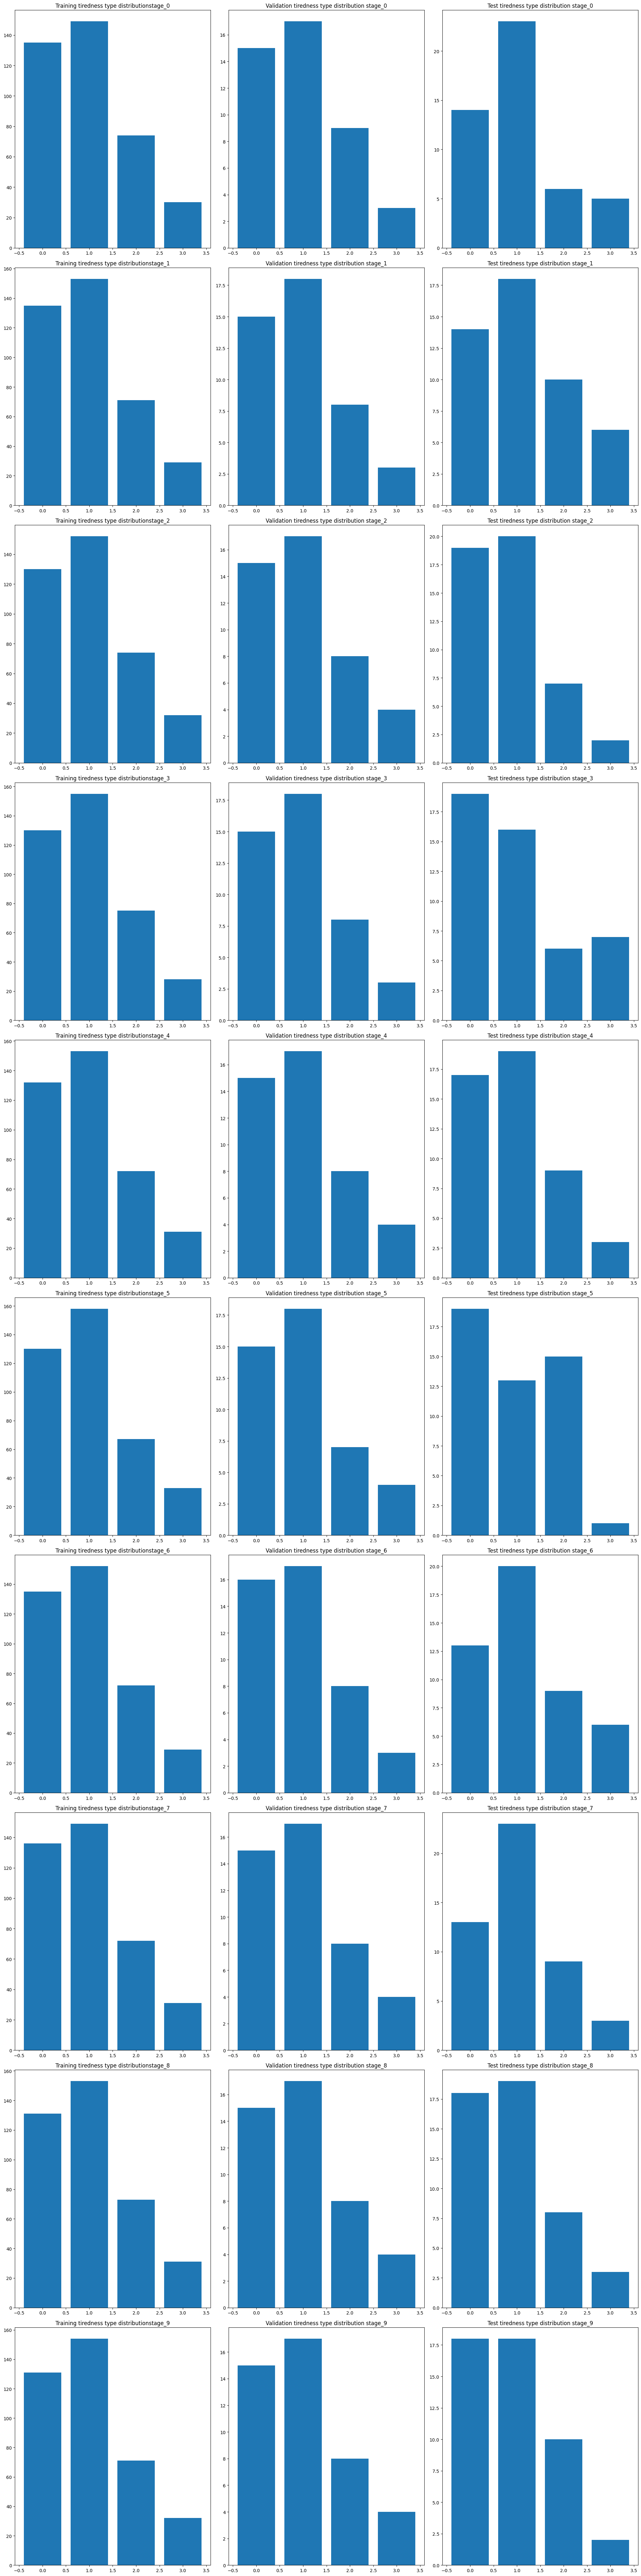

In [124]:
#train,test,val  distribution types
from matplotlib import pyplot as plt
import numpy as np

figure, axis = plt.subplots(10, 3,figsize=(20,80))

for idx,stage in enumerate(os.listdir(CROSS_VALIDATION_FOLDER),0):
    trainLabels=pd.read_csv(os.path.join(CROSS_VALIDATION_FOLDER,stage,"train_labels.csv"))
    testLabels=pd.read_csv(os.path.join(CROSS_VALIDATION_FOLDER,stage,"test_labels.csv"))
    validationLabels=pd.read_csv(os.path.join(CROSS_VALIDATION_FOLDER,stage,"validation_labels.csv")) 
    axis[idx,0].bar(trainLabels["TL"].value_counts().index,trainLabels["TL"].value_counts().values)
    axis[idx,0].set_title(f'Training tiredness type distribution{stage}')
    axis[idx,1].bar(validationLabels["TL"].value_counts().index,validationLabels["TL"].value_counts().values)
    axis[idx,1].set_title(f'Validation tiredness type distribution {stage}')
    axis[idx,2].bar(testLabels["TL"].value_counts().index,testLabels["TL"].value_counts().values)
    axis[idx,2].set_title(f'Test tiredness type distribution {stage}')
   
figure.tight_layout()
plt.show()


In [135]:
#visualizing a sample
df=pd.read_excel("cross_validation_stages/stage_0/train/C_Arithmetic_sub_1_trial1.xlsx",index_col=0)

In [136]:
df

,0,1,2,3,4,5,6,7,8,9,...,3190,3191,3192,3193,3194,3195,3196,3197,3198,3199
0,-1.238349,1.423979,5.487209,0.362032,-5.688521,-7.934538,-11.946015,-1.383142,7.400720,1.158316,...,-0.865501,-7.523300,-1.514338,7.036997,-2.089998,-5.305900,5.801765,9.169297,0.766763,-11.159236
1,-4.988367,0.069253,4.397978,-0.235997,-5.536040,-7.059374,-6.064190,2.680140,6.903366,2.088342,...,3.527061,-2.794795,-3.555096,4.706069,2.237116,-2.422919,4.396415,6.249630,-3.047622,-8.008471
2,-5.929496,1.123598,4.327303,0.739505,-1.953424,-6.967574,-6.680195,5.691126,9.858609,1.878361,...,8.027961,3.828462,-1.146786,2.926005,-1.000547,-3.019800,4.420858,6.365110,0.728073,-10.485836
3,-1.948994,1.418954,5.331584,-0.080356,-3.650026,-3.907720,-6.286109,-0.777122,7.610830,3.576929,...,-1.465453,-9.759067,-7.472346,0.588231,-1.285611,-2.277013,3.464898,5.475728,0.485034,-6.490425
4,0.238087,5.435294,8.425898,1.691007,-5.483109,-9.577273,-13.154152,-5.957117,1.482424,-0.047170,...,-1.182270,-6.808480,0.242258,4.855093,-3.115511,-3.728095,4.693681,7.808274,0.718819,-6.191471
5,-0.392472,6.040663,7.500547,1.783239,-4.147336,-8.685950,-10.970975,-3.161017,1.756808,0.512969,...,-1.273363,-8.155473,-1.453866,5.550989,0.243229,-5.134152,0.557554,8.182590,2.765390,-5.442055
6,2.599814,2.790714,3.795369,1.094156,-3.827763,-8.319988,-10.402503,-2.070273,1.846450,-0.926081,...,0.340357,-4.940677,0.026770,8.293966,1.297734,-5.211328,2.642948,8.383224,0.349376,-9.172465


In [144]:
df.loc[0]

0       -1.238349
1        1.423979
2        5.487209
3        0.362032
4       -5.688521
          ...    
3195    -5.305900
3196     5.801765
3197     9.169297
3198     0.766763
3199   -11.159236
Name: 0, Length: 3200, dtype: float64

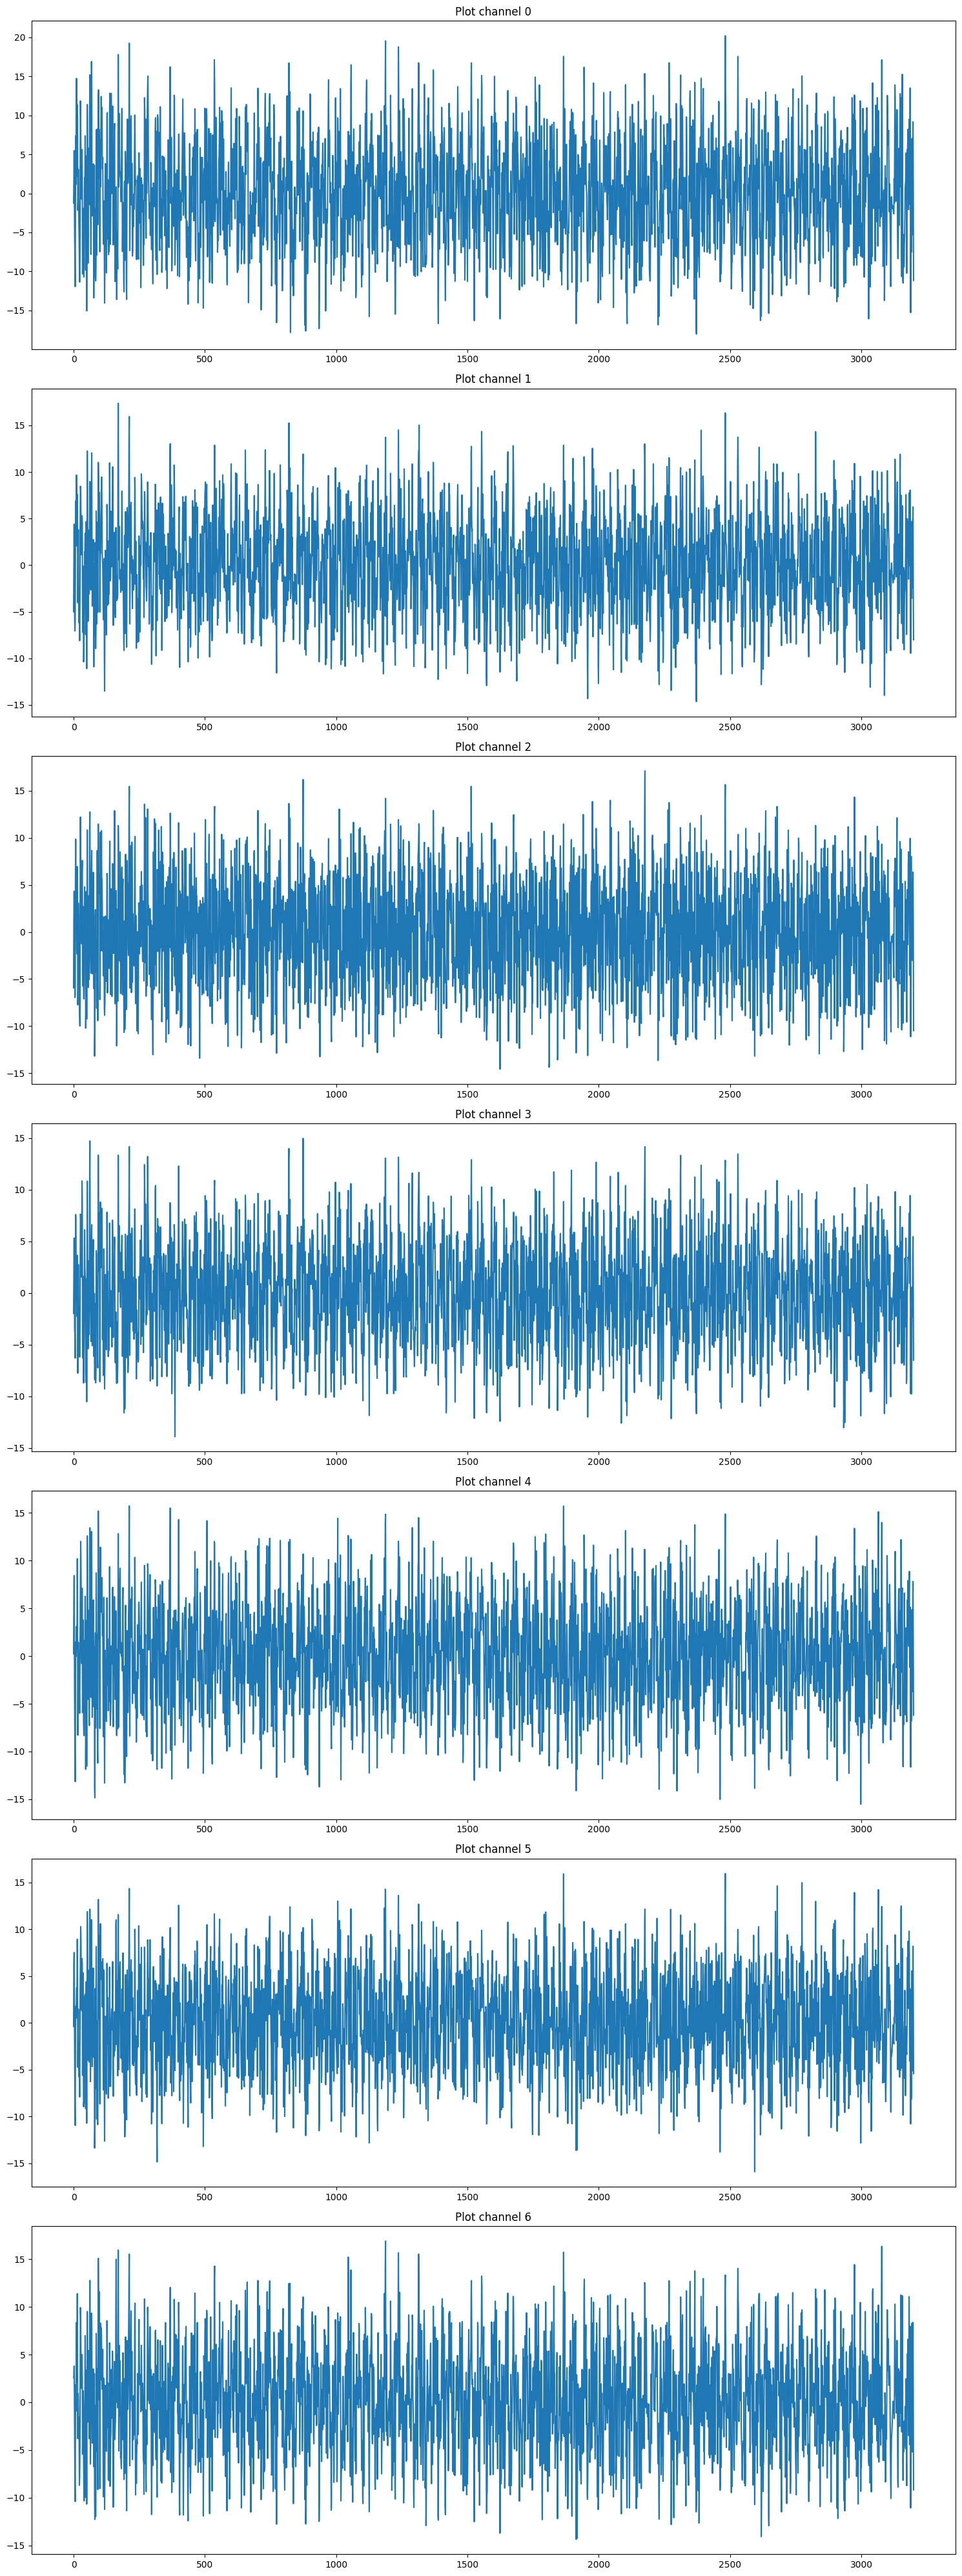

In [148]:
figure, axis = plt.subplots(7, 1,figsize=(15,40))

for i in range(7):
    axis[i].plot(df.loc[i])
    axis[i].set_title(f"Plot channel {i+1}")

figure.tight_layout()
plt.show()

# Data processing

In [38]:
#Time domain and frequency domain features extraction
import mne #mne is a known standard library for analyzing eeg signals
mne.set_log_level('WARNING')

def convertDFtoMNEObject(df):
    sfreq = 100  # Sampling frequency in Hz
    n_channels = 6 #number of channels available
    n_samples = 3200  #number of values

    # Create channel names
    ch_names = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']
    data_for_mne = df.values 

    # Create an MNE Info object
    # consistent with data
    info = mne.create_info(
        ch_names=ch_names,      # List of channel names
        sfreq=sfreq,             # Sampling frequency
        ch_types='eeg'           # Type of channels 
    )

    #Create the MNE Raw object
    raw_from_df = mne.io.RawArray(data_for_mne, info)

    return raw_from_df

def featuresExtractionTime(df):
    """
    Extracts features in the time domain:
        MIN min value
        MAX max value
        MEAN average value
        RMS root mean square
        VAR variance
        STD standard deviation
        POWER sum of the mean square values
        PEAK peak absolute value
        P2P peak to peak value
        CREST FACTOR The crest factor is the ratio of the peak value (absolute maximum amplitude) of a waveform to its RMS (Root Mean Square) value
        SKEW skewness
        KURTOSIS kurtosis
        FORM FACTOR The form factor is the ratio of the RMS (Root Mean Square) value of a waveform to its average value, indicates the "shape" of the waveform 
        PULSE INDICATOR refers to something that indicates the presence or characteristics of a pulse.
    """

    FEATURES_NAMES = ['MIN','MAX','MEAN','RMS','VAR','STD','POWER','PEAK','P2P','CREST FACTOR','SKEW','KURTOSIS','FORM FACTOR','PULSE INDICATOR']
    ROW_INDEXES = ['C1','C2','C3','C4','C5','C6']
    
    finalDataFrame= pd.DataFrame(index = ROW_INDEXES, columns = FEATURES_NAMES)

    
    

    for i in range(len(df)):
        Min=0;Max=0;Mean=0;Rms=0;Var=0;Std=0;Power=0;Peak=0;Skew=0;Kurtosis=0;P2p=0;CrestFactor=0;
        FormFactor=0; PulseIndicator=0;
        
        X = df.loc[i]
    
        ## TIME DOMAIN ##

   
        Min=np.min(X)
        Max=np.max(X)
        Mean=np.mean(X)
        Rms=np.sqrt(np.mean(X**2))
        Var=np.var(X)
        Std=np.std(X)
        Power=np.mean(X**2)
        Peak=np.max(np.abs(X))
        P2p=np.ptp(X)
        CrestFactor=np.max(np.abs(X))/np.sqrt(np.mean(X**2))
        Skew=stats.skew(X)
        Kurtosis=stats.kurtosis(X)
        FormFactor=np.sqrt(np.mean(X**2))/np.mean(X)
        PulseIndicator=np.max(np.abs(X))/np.mean(X)

        #Create dataframe from features
        finalDataFrame.loc[ROW_INDEXES[i]]=[Min,Max,Mean,Rms,Var,Std,Power,Peak,P2p,CrestFactor,Skew,Kurtosis,FormFactor,PulseIndicator]
        
    return finalDataFrame

def featuresExtractionFrequency(raw_data, bands=None):
    """
    Extracts feature in the frequency domain:
        Abs_delta_power, Rel_delta_power : Absolute and relative delta band power
        Abs_theta_power, Rel_theta_power : Absolute and relative theta band power
        Abs_alpha_power, Rel_alpha_power : Absolute and relative alpha band power
        Abs_beta_power, Rel_beta_power : Absolute and relative beta band power
        Abs_gamma_power, Rel_gamma_power : Absolute and relative gamma band power
        (Alpha+Theta) to Beta ratio
        Alpha to Theta ratio
        Theta to Alpha ratio
        Peak frequency
        Spectral entropy
    """
    if bands is None:
        bands = {
            'delta': [0.5, 4],
            'theta': [4, 8],
            'alpha': [8, 12],
            'beta': [12, 30],
            'gamma': [30, 45] # Limit gamma to avoid high-freq noise in dummy data
        }

    # Compute PSD using Welch's method
    # picks='eeg' ensures only EEG channels are processed
    # fmin, fmax define the overall frequency range for PSD calculation
    # n_fft: length of the FFT window (e.g., 4s * sfreq) using a window of 4 seconds
    spectrum = raw_data.compute_psd(method='welch', picks='eeg',
                                       fmin=0.5, fmax=45, verbose=False,
                                       n_fft=int(4 * raw_data.info['sfreq']))

    psds, freqs = spectrum.get_data(return_freqs=True)
    # psds shape: (n_channels, n_freq_bins)

    features = []
    channel_names = raw_data.ch_names
    total_power_all_channels = np.array([np.trapezoid(psds[i, :], freqs) for i in range(psds.shape[0])]) # Total power for each channel

    for i, ch_name in enumerate(channel_names):
        ch_features = {'Channel': ch_name}
        current_psd = psds[i, :]
        current_total_power = total_power_all_channels[i]

        abs_band_powers = {} #For ratios

        for band_name, (f_min, f_max) in bands.items():
            # Find indices of frequencies within the current band
            idx_band = np.where((freqs >= f_min) & (freqs <= f_max))[0]

            if len(idx_band) > 0:
                # Integrate power within the band using trapezoidal rule (simpson is often used too)
                band_power = np.trapezoid(current_psd[idx_band], freqs[idx_band])
                ch_features[f'Abs_{band_name}_Power'] = band_power
                ch_features[f'Rel_{band_name}_Power'] = band_power / current_total_power if current_total_power > 0 else 0
                abs_band_powers[band_name] = band_power
            else:
                ch_features[f'Abs_{band_name}_Power'] = 0
                ch_features[f'Rel_{band_name}_Power'] = 0
                abs_band_powers[band_name] = 0

        # --- Calculate Fatigue-Related Ratios ---
        theta_power = abs_band_powers.get('theta', 0)
        alpha_power = abs_band_powers.get('alpha', 0)
        beta_power = abs_band_powers.get('beta', 0)

        # 1. (Theta + Alpha) / Beta Ratio
        ch_features['Theta_Alpha_to_Beta_Ratio'] = (theta_power+alpha_power) / beta_power if beta_power > 0 else 0

        # 2. Theta / Alpha Ratio
        ch_features['Theta_to_Alpha_Ratio'] = theta_power / alpha_power if alpha_power > 0 else 0

        # 3. Alpha / Theta Ratio
        ch_features['Alpha_to_Theta_Ratio'] = alpha_power / theta_power if theta_power > 0 else 0

        # Additional PSD-based features per channel:
        max_power_idx = np.argmax(current_psd)
        ch_features['Peak_Frequency_Hz'] = freqs[max_power_idx]

        # Spectral Entropy
        normalized_psd = current_psd / np.sum(current_psd)
        spectral_entropy = -np.sum(normalized_psd * np.log2(normalized_psd + 1e-10))
        ch_features['Spectral_Entropy'] = spectral_entropy

        features.append(ch_features)

    return pd.DataFrame(features).set_index('Channel')

In [39]:
#Feature extraction , creates folder CROSS_FEATURES, recreate each stage of the cross validation
#each file will contain the features

FEATURE_EXTRACTION_FOLDER=r'CROSS_FEATURES_BALANCED'

if not os.path.exists(FEATURE_EXTRACTION_FOLDER):
    os.mkdir(FEATURE_EXTRACTION_FOLDER)
    print(f'Folder created: {FEATURE_EXTRACTION_FOLDER} in {os.getcwd()}')


for stage in os.listdir(CROSS_VALIDATION_FOLDER):
    
    os.mkdir(os.path.join(FEATURE_EXTRACTION_FOLDER,stage))
    for element in tqdm(os.listdir(os.path.join(CROSS_VALIDATION_FOLDER,stage)),desc=f'Looping throug {os.path.join(CROSS_VALIDATION_FOLDER,stage)}'):
        
        if not os.path.isdir(os.path.join(CROSS_VALIDATION_FOLDER,stage,element)):
            #found label file
            shutil.copy(os.path.join(CROSS_VALIDATION_FOLDER,stage,element),os.path.join(FEATURE_EXTRACTION_FOLDER,stage))
            #open file and modify the names
            lbls=pd.read_csv(os.path.join(FEATURE_EXTRACTION_FOLDER,stage,element))
            lbls['Matrix'] = lbls['Matrix'].str.replace(r'\.xlsx$', '_ef.xlsx', regex=True)
            lbls.to_csv(os.path.join(FEATURE_EXTRACTION_FOLDER,stage,element),index=False,sep=',')
            print(f'Created label file {element} in : {os.path.join(FEATURE_EXTRACTION_FOLDER,stage)}')
            continue
            
        os.mkdir(os.path.join(FEATURE_EXTRACTION_FOLDER,stage,element))
        
        for file in tqdm(os.listdir(os.path.join(CROSS_VALIDATION_FOLDER,stage,element)),desc=f'Extracting features from files inside {element} folder'):

            #separating name and extension
            filename,extension=os.path.splitext(file)
            #reading file
            df=pd.read_excel(os.path.join(CROSS_VALIDATION_FOLDER,stage,element,file),index_col=0)
            #extracting time domain features
            fdf=featuresExtractionTime(df)
            #extracting frequency domain features
            rd=convertDFtoMNEObject(df)
            fdf2=featuresExtractionFrequency(rd,None)
            #creating resulting dataframe
            rdf=pd.concat([fdf,fdf2],axis=1)
            rdf.to_excel(os.path.join(FEATURE_EXTRACTION_FOLDER,stage,element,filename+"_ef.xlsx"),index=False)
            
print(f'Feature extraction process terminated')

Folder created: CROSS_FEATURES_BALANCED in C:\Users\carlo\Desktop\mobile_project


Looping throug cross_validation_undersampled_ol_stages\stage_0:   0%|                            | 0/6 [00:00<?, ?it/s]
Extracting features from files inside test folder:   0%|                                        | 0/28 [00:00<?, ?it/s]
Extracting features from files inside test folder:   4%|█▏                              | 1/28 [00:00<00:13,  2.00it/s]
Extracting features from files inside test folder:   7%|██▎                             | 2/28 [00:00<00:08,  3.07it/s]
Extracting features from files inside test folder:  11%|███▍                            | 3/28 [00:01<00:07,  3.15it/s]
Extracting features from files inside test folder:  14%|████▌                           | 4/28 [00:01<00:06,  3.65it/s]
Extracting features from files inside test folder:  18%|█████▋                          | 5/28 [00:01<00:06,  3.45it/s]
Extracting features from files inside test folder:  21%|██████▊                         | 6/28 [00:01<00:05,  3.90it/s]
Extracting features from files inside te

Created label file test_labels.csv in : CROSS_FEATURES_BALANCED\stage_0



Extracting features from files inside train folder:   0%|                                      | 0/226 [00:00<?, ?it/s]
Extracting features from files inside train folder:   0%|▏                             | 1/226 [00:00<01:09,  3.23it/s]
Extracting features from files inside train folder:   1%|▎                             | 2/226 [00:00<00:53,  4.19it/s]
Extracting features from files inside train folder:   1%|▍                             | 3/226 [00:00<00:47,  4.71it/s]
Extracting features from files inside train folder:   2%|▌                             | 4/226 [00:00<00:55,  3.99it/s]
Extracting features from files inside train folder:   2%|▋                             | 5/226 [00:01<00:50,  4.34it/s]
Extracting features from files inside train folder:   3%|▊                             | 6/226 [00:01<00:56,  3.88it/s]
Extracting features from files inside train folder:   3%|▉                             | 7/226 [00:01<00:51,  4.28it/s]
Extracting features from files inside t

Created label file train_labels.csv in : CROSS_FEATURES_BALANCED\stage_0



Extracting features from files inside validation folder:   0%|                                  | 0/26 [00:00<?, ?it/s]
Extracting features from files inside validation folder:   4%|█                         | 1/26 [00:00<00:04,  5.06it/s]
Extracting features from files inside validation folder:   8%|██                        | 2/26 [00:00<00:06,  3.71it/s]
Extracting features from files inside validation folder:  12%|███                       | 3/26 [00:00<00:05,  4.31it/s]
Extracting features from files inside validation folder:  15%|████                      | 4/26 [00:01<00:05,  3.73it/s]
Extracting features from files inside validation folder:  19%|█████                     | 5/26 [00:01<00:05,  4.11it/s]
Extracting features from files inside validation folder:  23%|██████                    | 6/26 [00:01<00:04,  4.46it/s]
Extracting features from files inside validation folder:  27%|███████                   | 7/26 [00:01<00:05,  3.73it/s]
Extracting features from files inside v

Created label file validation_labels.csv in : CROSS_FEATURES_BALANCED\stage_0


Looping throug cross_validation_undersampled_ol_stages\stage_1:   0%|                            | 0/6 [00:00<?, ?it/s]
Extracting features from files inside test folder:   0%|                                        | 0/28 [00:00<?, ?it/s]
Extracting features from files inside test folder:   4%|█▏                              | 1/28 [00:00<00:05,  5.36it/s]
Extracting features from files inside test folder:   7%|██▎                             | 2/28 [00:00<00:07,  3.58it/s]
Extracting features from files inside test folder:  11%|███▍                            | 3/28 [00:00<00:06,  4.13it/s]
Extracting features from files inside test folder:  14%|████▌                           | 4/28 [00:00<00:05,  4.55it/s]
Extracting features from files inside test folder:  18%|█████▋                          | 5/28 [00:01<00:05,  3.90it/s]
Extracting features from files inside test folder:  21%|██████▊                         | 6/28 [00:01<00:05,  4.23it/s]
Extracting features from files inside te

Created label file test_labels.csv in : CROSS_FEATURES_BALANCED\stage_1



Extracting features from files inside train folder:   0%|                                      | 0/226 [00:00<?, ?it/s]
Extracting features from files inside train folder:   0%|▏                             | 1/226 [00:00<01:09,  3.23it/s]
Extracting features from files inside train folder:   1%|▎                             | 2/226 [00:00<00:54,  4.10it/s]
Extracting features from files inside train folder:   1%|▍                             | 3/226 [00:00<01:02,  3.58it/s]
Extracting features from files inside train folder:   2%|▌                             | 4/226 [00:01<00:54,  4.05it/s]
Extracting features from files inside train folder:   2%|▋                             | 5/226 [00:01<00:51,  4.31it/s]
Extracting features from files inside train folder:   3%|▊                             | 6/226 [00:01<00:57,  3.84it/s]
Extracting features from files inside train folder:   3%|▉                             | 7/226 [00:01<00:52,  4.14it/s]
Extracting features from files inside t

Created label file train_labels.csv in : CROSS_FEATURES_BALANCED\stage_1



Extracting features from files inside validation folder:   0%|                                  | 0/26 [00:00<?, ?it/s]
Extracting features from files inside validation folder:   4%|█                         | 1/26 [00:00<00:04,  5.02it/s]
Extracting features from files inside validation folder:   8%|██                        | 2/26 [00:00<00:06,  3.62it/s]
Extracting features from files inside validation folder:  12%|███                       | 3/26 [00:00<00:05,  4.12it/s]
Extracting features from files inside validation folder:  15%|████                      | 4/26 [00:01<00:06,  3.66it/s]
Extracting features from files inside validation folder:  19%|█████                     | 5/26 [00:01<00:05,  4.10it/s]
Extracting features from files inside validation folder:  23%|██████                    | 6/26 [00:01<00:05,  3.70it/s]
Extracting features from files inside validation folder:  27%|███████                   | 7/26 [00:01<00:04,  4.05it/s]
Extracting features from files inside v

Created label file validation_labels.csv in : CROSS_FEATURES_BALANCED\stage_1


Looping throug cross_validation_undersampled_ol_stages\stage_2:   0%|                            | 0/6 [00:00<?, ?it/s]
Extracting features from files inside test folder:   0%|                                        | 0/28 [00:00<?, ?it/s]
Extracting features from files inside test folder:   4%|█▏                              | 1/28 [00:00<00:05,  5.29it/s]
Extracting features from files inside test folder:   7%|██▎                             | 2/28 [00:00<00:06,  3.72it/s]
Extracting features from files inside test folder:  11%|███▍                            | 3/28 [00:00<00:05,  4.21it/s]
Extracting features from files inside test folder:  14%|████▌                           | 4/28 [00:01<00:06,  3.75it/s]
Extracting features from files inside test folder:  18%|█████▋                          | 5/28 [00:01<00:05,  4.13it/s]
Extracting features from files inside test folder:  21%|██████▊                         | 6/28 [00:01<00:04,  4.50it/s]
Extracting features from files inside te

Created label file test_labels.csv in : CROSS_FEATURES_BALANCED\stage_2



Extracting features from files inside train folder:   0%|                                      | 0/226 [00:00<?, ?it/s]
Extracting features from files inside train folder:   0%|▏                             | 1/226 [00:00<00:39,  5.67it/s]
Extracting features from files inside train folder:   1%|▎                             | 2/226 [00:00<00:39,  5.64it/s]
Extracting features from files inside train folder:   1%|▍                             | 3/226 [00:00<00:53,  4.17it/s]
Extracting features from files inside train folder:   2%|▌                             | 4/226 [00:00<00:48,  4.58it/s]
Extracting features from files inside train folder:   2%|▋                             | 5/226 [00:01<00:55,  3.97it/s]
Extracting features from files inside train folder:   3%|▊                             | 6/226 [00:01<00:51,  4.29it/s]
Extracting features from files inside train folder:   3%|▉                             | 7/226 [00:01<00:48,  4.53it/s]
Extracting features from files inside t

Created label file train_labels.csv in : CROSS_FEATURES_BALANCED\stage_2



Extracting features from files inside validation folder:   0%|                                  | 0/26 [00:00<?, ?it/s]
Extracting features from files inside validation folder:   4%|█                         | 1/26 [00:00<00:08,  2.99it/s]
Extracting features from files inside validation folder:   8%|██                        | 2/26 [00:00<00:06,  3.85it/s]
Extracting features from files inside validation folder:  12%|███                       | 3/26 [00:00<00:06,  3.38it/s]
Extracting features from files inside validation folder:  15%|████                      | 4/26 [00:01<00:05,  3.88it/s]
Extracting features from files inside validation folder:  19%|█████                     | 5/26 [00:01<00:04,  4.28it/s]
Extracting features from files inside validation folder:  23%|██████                    | 6/26 [00:01<00:05,  3.84it/s]
Extracting features from files inside validation folder:  27%|███████                   | 7/26 [00:01<00:04,  4.11it/s]
Extracting features from files inside v

Created label file validation_labels.csv in : CROSS_FEATURES_BALANCED\stage_2


Looping throug cross_validation_undersampled_ol_stages\stage_3:   0%|                            | 0/6 [00:00<?, ?it/s]
Extracting features from files inside test folder:   0%|                                        | 0/28 [00:00<?, ?it/s]
Extracting features from files inside test folder:   4%|█▏                              | 1/28 [00:00<00:08,  3.16it/s]
Extracting features from files inside test folder:   7%|██▎                             | 2/28 [00:00<00:06,  4.09it/s]
Extracting features from files inside test folder:  11%|███▍                            | 3/28 [00:00<00:05,  4.51it/s]
Extracting features from files inside test folder:  14%|████▌                           | 4/28 [00:01<00:06,  3.80it/s]
Extracting features from files inside test folder:  18%|█████▋                          | 5/28 [00:01<00:05,  4.17it/s]
Extracting features from files inside test folder:  21%|██████▊                         | 6/28 [00:01<00:05,  3.69it/s]
Extracting features from files inside te

Created label file test_labels.csv in : CROSS_FEATURES_BALANCED\stage_3



Extracting features from files inside train folder:   0%|                                      | 0/226 [00:00<?, ?it/s]
Extracting features from files inside train folder:   0%|▏                             | 1/226 [00:00<00:43,  5.22it/s]
Extracting features from files inside train folder:   1%|▎                             | 2/226 [00:00<00:58,  3.81it/s]
Extracting features from files inside train folder:   1%|▍                             | 3/226 [00:00<00:51,  4.31it/s]
Extracting features from files inside train folder:   2%|▌                             | 4/226 [00:00<00:49,  4.44it/s]
Extracting features from files inside train folder:   2%|▋                             | 5/226 [00:01<00:58,  3.81it/s]
Extracting features from files inside train folder:   3%|▊                             | 6/226 [00:01<00:53,  4.15it/s]
Extracting features from files inside train folder:   3%|▉                             | 7/226 [00:01<00:59,  3.68it/s]
Extracting features from files inside t

Created label file train_labels.csv in : CROSS_FEATURES_BALANCED\stage_3



Extracting features from files inside validation folder:   0%|                                  | 0/26 [00:00<?, ?it/s]
Extracting features from files inside validation folder:   4%|█                         | 1/26 [00:00<00:07,  3.26it/s]
Extracting features from files inside validation folder:   8%|██                        | 2/26 [00:00<00:05,  4.21it/s]
Extracting features from files inside validation folder:  12%|███                       | 3/26 [00:00<00:06,  3.65it/s]
Extracting features from files inside validation folder:  15%|████                      | 4/26 [00:01<00:05,  4.12it/s]
Extracting features from files inside validation folder:  19%|█████                     | 5/26 [00:01<00:05,  3.74it/s]
Extracting features from files inside validation folder:  23%|██████                    | 6/26 [00:01<00:04,  4.09it/s]
Extracting features from files inside validation folder:  27%|███████                   | 7/26 [00:01<00:04,  4.39it/s]
Extracting features from files inside v

Created label file validation_labels.csv in : CROSS_FEATURES_BALANCED\stage_3


Looping throug cross_validation_undersampled_ol_stages\stage_4:   0%|                            | 0/6 [00:00<?, ?it/s]
Extracting features from files inside test folder:   0%|                                        | 0/28 [00:00<?, ?it/s]
Extracting features from files inside test folder:   4%|█▏                              | 1/28 [00:00<00:09,  2.98it/s]
Extracting features from files inside test folder:   7%|██▎                             | 2/28 [00:00<00:06,  3.83it/s]
Extracting features from files inside test folder:  11%|███▍                            | 3/28 [00:00<00:07,  3.47it/s]
Extracting features from files inside test folder:  14%|████▌                           | 4/28 [00:01<00:05,  4.08it/s]
Extracting features from files inside test folder:  18%|█████▋                          | 5/28 [00:01<00:05,  4.53it/s]
Extracting features from files inside test folder:  21%|██████▊                         | 6/28 [00:01<00:05,  3.97it/s]
Extracting features from files inside te

Created label file test_labels.csv in : CROSS_FEATURES_BALANCED\stage_4



Extracting features from files inside train folder:   0%|                                      | 0/226 [00:00<?, ?it/s]
Extracting features from files inside train folder:   0%|▏                             | 1/226 [00:00<00:40,  5.58it/s]
Extracting features from files inside train folder:   1%|▎                             | 2/226 [00:00<00:56,  3.96it/s]
Extracting features from files inside train folder:   1%|▍                             | 3/226 [00:00<00:49,  4.46it/s]
Extracting features from files inside train folder:   2%|▌                             | 4/226 [00:00<00:57,  3.87it/s]
Extracting features from files inside train folder:   2%|▋                             | 5/226 [00:01<00:51,  4.29it/s]
Extracting features from files inside train folder:   3%|▊                             | 6/226 [00:01<00:47,  4.60it/s]
Extracting features from files inside train folder:   3%|▉                             | 7/226 [00:01<00:54,  3.99it/s]
Extracting features from files inside t

Created label file train_labels.csv in : CROSS_FEATURES_BALANCED\stage_4



Extracting features from files inside validation folder:   0%|                                  | 0/26 [00:00<?, ?it/s]
Extracting features from files inside validation folder:   4%|█                         | 1/26 [00:00<00:04,  5.05it/s]
Extracting features from files inside validation folder:   8%|██                        | 2/26 [00:00<00:06,  3.73it/s]
Extracting features from files inside validation folder:  12%|███                       | 3/26 [00:00<00:05,  4.06it/s]
Extracting features from files inside validation folder:  15%|████                      | 4/26 [00:00<00:04,  4.43it/s]
Extracting features from files inside validation folder:  19%|█████                     | 5/26 [00:01<00:05,  3.70it/s]
Extracting features from files inside validation folder:  23%|██████                    | 6/26 [00:01<00:04,  4.02it/s]
Extracting features from files inside validation folder:  27%|███████                   | 7/26 [00:01<00:05,  3.69it/s]
Extracting features from files inside v

Created label file validation_labels.csv in : CROSS_FEATURES_BALANCED\stage_4


Looping throug cross_validation_undersampled_ol_stages\stage_5:   0%|                            | 0/6 [00:00<?, ?it/s]
Extracting features from files inside test folder:   0%|                                        | 0/28 [00:00<?, ?it/s]
Extracting features from files inside test folder:   4%|█▏                              | 1/28 [00:00<00:05,  4.93it/s]
Extracting features from files inside test folder:   7%|██▎                             | 2/28 [00:00<00:05,  5.07it/s]
Extracting features from files inside test folder:  11%|███▍                            | 3/28 [00:00<00:06,  3.97it/s]
Extracting features from files inside test folder:  14%|████▌                           | 4/28 [00:00<00:05,  4.45it/s]
Extracting features from files inside test folder:  18%|█████▋                          | 5/28 [00:01<00:05,  3.91it/s]
Extracting features from files inside test folder:  21%|██████▊                         | 6/28 [00:01<00:05,  4.36it/s]
Extracting features from files inside te

Created label file test_labels.csv in : CROSS_FEATURES_BALANCED\stage_5



Extracting features from files inside train folder:   0%|                                      | 0/226 [00:00<?, ?it/s]
Extracting features from files inside train folder:   0%|▏                             | 1/226 [00:00<01:09,  3.22it/s]
Extracting features from files inside train folder:   1%|▎                             | 2/226 [00:00<00:54,  4.13it/s]
Extracting features from files inside train folder:   1%|▍                             | 3/226 [00:00<00:48,  4.60it/s]
Extracting features from files inside train folder:   2%|▌                             | 4/226 [00:01<00:57,  3.84it/s]
Extracting features from files inside train folder:   2%|▋                             | 5/226 [00:01<00:52,  4.22it/s]
Extracting features from files inside train folder:   3%|▊                             | 6/226 [00:01<00:57,  3.84it/s]
Extracting features from files inside train folder:   3%|▉                             | 7/226 [00:01<00:52,  4.19it/s]
Extracting features from files inside t

Created label file train_labels.csv in : CROSS_FEATURES_BALANCED\stage_5



Extracting features from files inside validation folder:   0%|                                  | 0/26 [00:00<?, ?it/s]
Extracting features from files inside validation folder:   4%|█                         | 1/26 [00:00<00:07,  3.26it/s]
Extracting features from files inside validation folder:   8%|██                        | 2/26 [00:00<00:05,  4.19it/s]
Extracting features from files inside validation folder:  12%|███                       | 3/26 [00:00<00:04,  4.72it/s]
Extracting features from files inside validation folder:  15%|████                      | 4/26 [00:00<00:05,  3.94it/s]
Extracting features from files inside validation folder:  19%|█████                     | 5/26 [00:01<00:04,  4.26it/s]
Extracting features from files inside validation folder:  23%|██████                    | 6/26 [00:01<00:05,  3.86it/s]
Extracting features from files inside validation folder:  27%|███████                   | 7/26 [00:01<00:04,  4.25it/s]
Extracting features from files inside v

Created label file validation_labels.csv in : CROSS_FEATURES_BALANCED\stage_5


Looping throug cross_validation_undersampled_ol_stages\stage_6:   0%|                            | 0/6 [00:00<?, ?it/s]
Extracting features from files inside test folder:   0%|                                        | 0/28 [00:00<?, ?it/s]
Extracting features from files inside test folder:   4%|█▏                              | 1/28 [00:00<00:04,  5.69it/s]
Extracting features from files inside test folder:   7%|██▎                             | 2/28 [00:00<00:06,  3.96it/s]
Extracting features from files inside test folder:  11%|███▍                            | 3/28 [00:00<00:05,  4.52it/s]
Extracting features from files inside test folder:  14%|████▌                           | 4/28 [00:00<00:06,  3.90it/s]
Extracting features from files inside test folder:  18%|█████▋                          | 5/28 [00:01<00:05,  4.38it/s]
Extracting features from files inside test folder:  21%|██████▊                         | 6/28 [00:01<00:04,  4.57it/s]
Extracting features from files inside te

Created label file test_labels.csv in : CROSS_FEATURES_BALANCED\stage_6



Extracting features from files inside train folder:   0%|                                      | 0/226 [00:00<?, ?it/s]
Extracting features from files inside train folder:   0%|▏                             | 1/226 [00:00<01:12,  3.12it/s]
Extracting features from files inside train folder:   1%|▎                             | 2/226 [00:00<00:55,  4.04it/s]
Extracting features from files inside train folder:   1%|▍                             | 3/226 [00:00<01:04,  3.45it/s]
Extracting features from files inside train folder:   2%|▌                             | 4/226 [00:01<00:56,  3.93it/s]
Extracting features from files inside train folder:   2%|▋                             | 5/226 [00:01<01:01,  3.60it/s]
Extracting features from files inside train folder:   3%|▊                             | 6/226 [00:01<00:55,  3.97it/s]
Extracting features from files inside train folder:   3%|▉                             | 7/226 [00:01<00:50,  4.36it/s]
Extracting features from files inside t

Created label file train_labels.csv in : CROSS_FEATURES_BALANCED\stage_6



Extracting features from files inside validation folder:   0%|                                  | 0/26 [00:00<?, ?it/s]
Extracting features from files inside validation folder:   4%|█                         | 1/26 [00:00<00:08,  3.06it/s]
Extracting features from files inside validation folder:   8%|██                        | 2/26 [00:00<00:06,  3.96it/s]
Extracting features from files inside validation folder:  12%|███                       | 3/26 [00:00<00:05,  4.45it/s]
Extracting features from files inside validation folder:  15%|████                      | 4/26 [00:01<00:05,  3.75it/s]
Extracting features from files inside validation folder:  19%|█████                     | 5/26 [00:01<00:05,  4.16it/s]
Extracting features from files inside validation folder:  23%|██████                    | 6/26 [00:01<00:05,  3.69it/s]
Extracting features from files inside validation folder:  27%|███████                   | 7/26 [00:01<00:04,  4.04it/s]
Extracting features from files inside v

Created label file validation_labels.csv in : CROSS_FEATURES_BALANCED\stage_6


Looping throug cross_validation_undersampled_ol_stages\stage_7:   0%|                            | 0/6 [00:00<?, ?it/s]
Extracting features from files inside test folder:   0%|                                        | 0/28 [00:00<?, ?it/s]
Extracting features from files inside test folder:   4%|█▏                              | 1/28 [00:00<00:05,  4.96it/s]
Extracting features from files inside test folder:   7%|██▎                             | 2/28 [00:00<00:06,  3.75it/s]
Extracting features from files inside test folder:  11%|███▍                            | 3/28 [00:00<00:05,  4.34it/s]
Extracting features from files inside test folder:  14%|████▌                           | 4/28 [00:01<00:06,  3.72it/s]
Extracting features from files inside test folder:  18%|█████▋                          | 5/28 [00:01<00:05,  4.19it/s]
Extracting features from files inside test folder:  21%|██████▊                         | 6/28 [00:01<00:05,  3.74it/s]
Extracting features from files inside te

Created label file test_labels.csv in : CROSS_FEATURES_BALANCED\stage_7



Extracting features from files inside train folder:   0%|                                      | 0/226 [00:00<?, ?it/s]
Extracting features from files inside train folder:   0%|▏                             | 1/226 [00:00<00:42,  5.30it/s]
Extracting features from files inside train folder:   1%|▎                             | 2/226 [00:00<00:42,  5.24it/s]
Extracting features from files inside train folder:   1%|▍                             | 3/226 [00:00<00:57,  3.89it/s]
Extracting features from files inside train folder:   2%|▌                             | 4/226 [00:00<00:52,  4.27it/s]
Extracting features from files inside train folder:   2%|▋                             | 5/226 [00:01<00:58,  3.77it/s]
Extracting features from files inside train folder:   3%|▊                             | 6/226 [00:01<00:53,  4.14it/s]
Extracting features from files inside train folder:   3%|▉                             | 7/226 [00:01<00:59,  3.70it/s]
Extracting features from files inside t

Created label file train_labels.csv in : CROSS_FEATURES_BALANCED\stage_7



Extracting features from files inside validation folder:   0%|                                  | 0/26 [00:00<?, ?it/s]
Extracting features from files inside validation folder:   4%|█                         | 1/26 [00:00<00:07,  3.26it/s]
Extracting features from files inside validation folder:   8%|██                        | 2/26 [00:00<00:05,  4.21it/s]
Extracting features from files inside validation folder:  12%|███                       | 3/26 [00:00<00:06,  3.58it/s]
Extracting features from files inside validation folder:  15%|████                      | 4/26 [00:01<00:05,  3.95it/s]
Extracting features from files inside validation folder:  19%|█████                     | 5/26 [00:01<00:04,  4.24it/s]
Extracting features from files inside validation folder:  23%|██████                    | 6/26 [00:01<00:05,  3.77it/s]
Extracting features from files inside validation folder:  27%|███████                   | 7/26 [00:01<00:04,  4.07it/s]
Extracting features from files inside v

Created label file validation_labels.csv in : CROSS_FEATURES_BALANCED\stage_7


Looping throug cross_validation_undersampled_ol_stages\stage_8:   0%|                            | 0/6 [00:00<?, ?it/s]
Extracting features from files inside test folder:   0%|                                        | 0/28 [00:00<?, ?it/s]
Extracting features from files inside test folder:   4%|█▏                              | 1/28 [00:00<00:08,  3.24it/s]
Extracting features from files inside test folder:   7%|██▎                             | 2/28 [00:00<00:06,  4.27it/s]
Extracting features from files inside test folder:  11%|███▍                            | 3/28 [00:00<00:05,  4.58it/s]
Extracting features from files inside test folder:  14%|████▌                           | 4/28 [00:01<00:06,  3.92it/s]
Extracting features from files inside test folder:  18%|█████▋                          | 5/28 [00:01<00:05,  4.35it/s]
Extracting features from files inside test folder:  21%|██████▊                         | 6/28 [00:01<00:05,  3.84it/s]
Extracting features from files inside te

Created label file test_labels.csv in : CROSS_FEATURES_BALANCED\stage_8



Extracting features from files inside train folder:   0%|                                      | 0/226 [00:00<?, ?it/s]
Extracting features from files inside train folder:   0%|▏                             | 1/226 [00:00<00:43,  5.12it/s]
Extracting features from files inside train folder:   1%|▎                             | 2/226 [00:00<00:59,  3.77it/s]
Extracting features from files inside train folder:   1%|▍                             | 3/226 [00:00<00:51,  4.29it/s]
Extracting features from files inside train folder:   2%|▌                             | 4/226 [00:00<00:49,  4.50it/s]
Extracting features from files inside train folder:   2%|▋                             | 5/226 [00:01<00:58,  3.81it/s]
Extracting features from files inside train folder:   3%|▊                             | 6/226 [00:01<00:52,  4.17it/s]
Extracting features from files inside train folder:   3%|▉                             | 7/226 [00:01<00:59,  3.67it/s]
Extracting features from files inside t

Created label file train_labels.csv in : CROSS_FEATURES_BALANCED\stage_8



Extracting features from files inside validation folder:   0%|                                  | 0/26 [00:00<?, ?it/s]
Extracting features from files inside validation folder:   4%|█                         | 1/26 [00:00<00:04,  5.06it/s]
Extracting features from files inside validation folder:   8%|██                        | 2/26 [00:00<00:04,  4.81it/s]
Extracting features from files inside validation folder:  12%|███                       | 3/26 [00:00<00:06,  3.76it/s]
Extracting features from files inside validation folder:  15%|████                      | 4/26 [00:00<00:05,  4.12it/s]
Extracting features from files inside validation folder:  19%|█████                     | 5/26 [00:01<00:05,  3.68it/s]
Extracting features from files inside validation folder:  23%|██████                    | 6/26 [00:01<00:04,  4.00it/s]
Extracting features from files inside validation folder:  27%|███████                   | 7/26 [00:01<00:04,  4.25it/s]
Extracting features from files inside v

Created label file validation_labels.csv in : CROSS_FEATURES_BALANCED\stage_8


Looping throug cross_validation_undersampled_ol_stages\stage_9:   0%|                            | 0/6 [00:00<?, ?it/s]
Extracting features from files inside test folder:   0%|                                        | 0/28 [00:00<?, ?it/s]
Extracting features from files inside test folder:   4%|█▏                              | 1/28 [00:00<00:08,  3.19it/s]
Extracting features from files inside test folder:   7%|██▎                             | 2/28 [00:00<00:06,  4.04it/s]
Extracting features from files inside test folder:  11%|███▍                            | 3/28 [00:00<00:05,  4.44it/s]
Extracting features from files inside test folder:  14%|████▌                           | 4/28 [00:01<00:06,  3.75it/s]
Extracting features from files inside test folder:  18%|█████▋                          | 5/28 [00:01<00:05,  4.13it/s]
Extracting features from files inside test folder:  21%|██████▊                         | 6/28 [00:01<00:05,  3.69it/s]
Extracting features from files inside te

Created label file test_labels.csv in : CROSS_FEATURES_BALANCED\stage_9



Extracting features from files inside train folder:   0%|                                      | 0/226 [00:00<?, ?it/s]
Extracting features from files inside train folder:   0%|▏                             | 1/226 [00:00<00:45,  4.98it/s]
Extracting features from files inside train folder:   1%|▎                             | 2/226 [00:00<01:01,  3.65it/s]
Extracting features from files inside train folder:   1%|▍                             | 3/226 [00:00<00:53,  4.14it/s]
Extracting features from files inside train folder:   2%|▌                             | 4/226 [00:01<01:02,  3.57it/s]
Extracting features from files inside train folder:   2%|▋                             | 5/226 [00:01<00:55,  3.96it/s]
Extracting features from files inside train folder:   3%|▊                             | 6/226 [00:01<00:51,  4.27it/s]
Extracting features from files inside train folder:   3%|▉                             | 7/226 [00:01<00:58,  3.72it/s]
Extracting features from files inside t

Created label file train_labels.csv in : CROSS_FEATURES_BALANCED\stage_9



Extracting features from files inside validation folder:   0%|                                  | 0/26 [00:00<?, ?it/s]
Extracting features from files inside validation folder:   4%|█                         | 1/26 [00:00<00:04,  5.28it/s]
Extracting features from files inside validation folder:   8%|██                        | 2/26 [00:00<00:06,  3.76it/s]
Extracting features from files inside validation folder:  12%|███                       | 3/26 [00:00<00:05,  4.22it/s]
Extracting features from files inside validation folder:  15%|████                      | 4/26 [00:00<00:04,  4.57it/s]
Extracting features from files inside validation folder:  19%|█████                     | 5/26 [00:01<00:05,  4.00it/s]
Extracting features from files inside validation folder:  23%|██████                    | 6/26 [00:01<00:04,  4.31it/s]
Extracting features from files inside validation folder:  27%|███████                   | 7/26 [00:01<00:05,  3.70it/s]
Extracting features from files inside v

Created label file validation_labels.csv in : CROSS_FEATURES_BALANCED\stage_9
Feature extraction process terminated


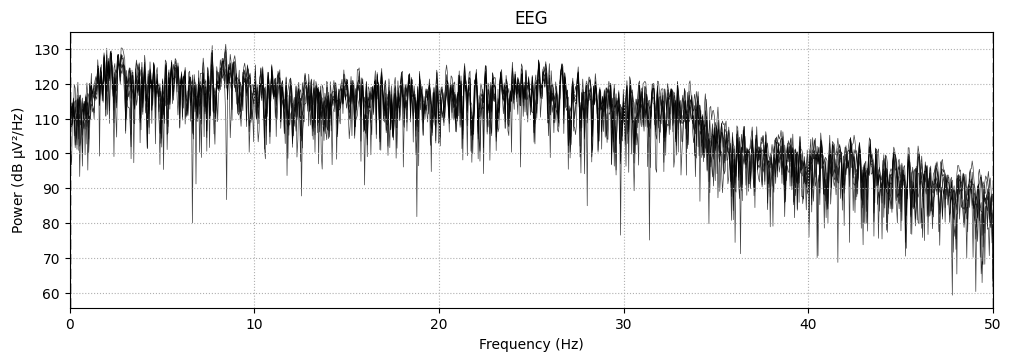

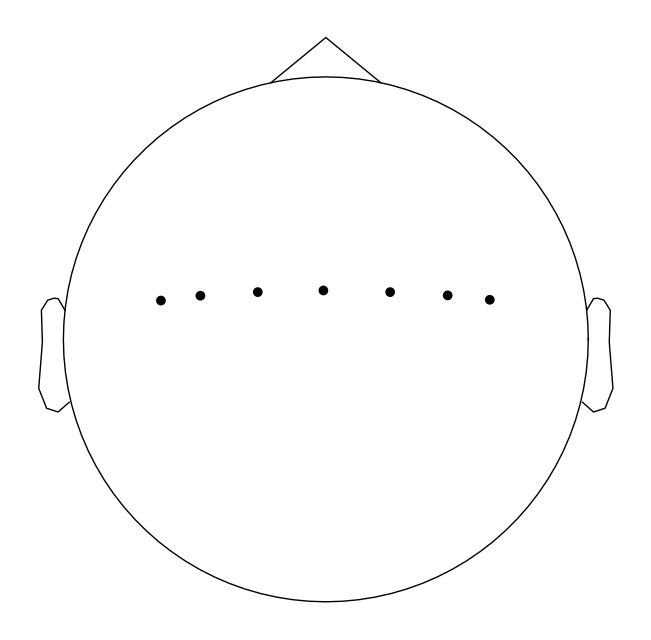

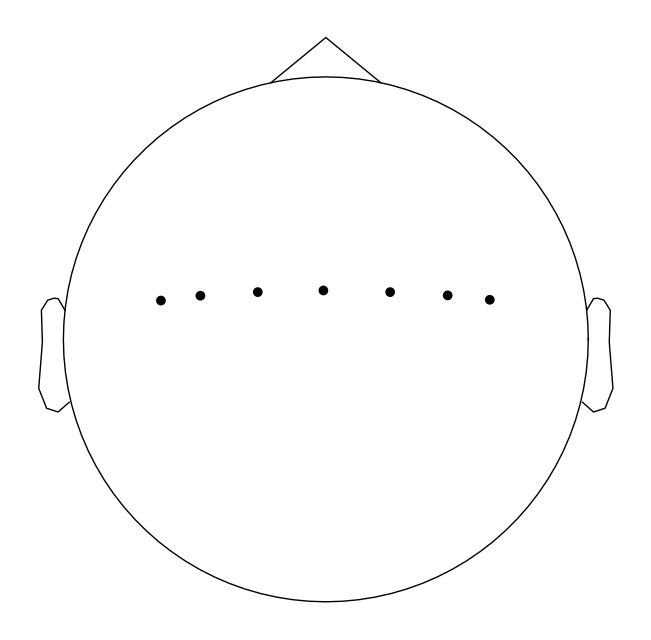

In [58]:
#visualizing the power spectral density of the last file analyzed
montage = mne.channels.make_standard_montage('standard_1020')
rd.set_montage(montage, on_missing='warn')
rd.plot_sensors()

# Feature selection

In [60]:
#Loading data
TRAIN_DATA_PATH=r'CROSS_FEATURES/stage_0/train'
TEST_DATA_PATH=r'CROSS_FEATURES/stage_0/test'

TRAIN_LABELS_PATH=r'CROSS_FEATURES/stage_0/train_labels.csv'
TEST_LABELS_PATH=r'CROSS_FEATURES/stage_0/test_labels.csv'

train_label_df=pd.read_csv(TRAIN_LABELS_PATH)
test_label_df=pd.read_csv(TEST_LABELS_PATH)

In [67]:
train_matrices_list=[]
train_labels=[]

test_matrices_list=[]
test_labels=[]

for matrix in os.listdir(TRAIN_DATA_PATH):
    #get label
    train_labels.append(train_label_df[train_label_df.Matrix==matrix]["TL"].iloc[0])
    tdf=pd.read_excel(os.path.join(TRAIN_DATA_PATH,matrix))
    train_matrices_list.append(tdf.to_numpy().flatten())

X_train=np.array(train_matrices_list)
Y_train=np.array(train_labels)

for matrix in os.listdir(TEST_DATA_PATH):
    #get label
    test_labels.append(test_label_df[test_label_df.Matrix==matrix]["TL"].iloc[0])
    tdf=pd.read_excel(os.path.join(TEST_DATA_PATH,matrix))
    test_matrices_list.append(tdf.to_numpy().flatten())

X_test=np.array(test_matrices_list)
Y_test=np.array(test_labels)

In [68]:
X_train.shape

(388, 189)

In [71]:
#method performed on the first stage of the cross validation

### Feature selection
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [72]:
#Decision tree test
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

y_pred = clf.predict(X_test)

print(classification_report(Y_test, y_pred, target_names=["0","1","2","3"]))

              precision    recall  f1-score   support

           0       0.32      0.43      0.36        14
           1       0.47      0.30      0.37        23
           2       0.09      0.17      0.12         6
           3       0.33      0.20      0.25         5

    accuracy                           0.31        48
   macro avg       0.30      0.27      0.27        48
weighted avg       0.36      0.31      0.32        48



In [ ]:
162 40 20 10 5

In [74]:
importances = clf.feature_importances_
featuresImp=[(col,imp) for col,imp in zip(X_train,importances)]

threshold=0.02

featuresStats=[(ft,imp) for (ft, imp) in featuresImp if imp>threshold]
featuresStats=sorted(featuresStats,key=lambda x: x[1],reverse=True)

featuresStats

[(array([-2.29807398e+01,  2.14961483e+01,  1.45604569e-02,  6.27352810e+00,
          3.93569428e+01,  6.27351120e+00,  3.93571548e+01,  2.29807398e+01,
          4.44768882e+01,  3.66312854e+00, -6.58297459e-02, -2.55855062e-01,
          8.25656077e+00,  2.10228560e-01,  7.59618499e+00,  1.93414071e-01,
          5.61559687e+00,  1.42984334e-01,  1.58659722e+01,  4.03979403e-01,
          1.93989588e+00,  4.93936313e-02,  8.32711776e-01,  1.35269414e+00,
          7.39265418e-01,  2.00000000e+00,  6.84987953e+00, -1.91084103e+01,
          1.65970286e+01,  8.51348448e-02,  5.59357720e+00,  3.12808579e+01,
          5.59292928e+00,  3.12881059e+01,  1.91084103e+01,  3.57054389e+01,
          3.41613419e+00, -4.12920654e-02, -7.67806531e-02,  6.86435200e+00,
          2.19152354e-01,  6.08164549e+00,  1.94163546e-01,  5.31813887e+00,
          1.69787717e-01,  1.18755754e+01,  3.79141440e-01,  1.18257102e+00,
          3.77549437e-02,  9.59935328e-01,  1.14356651e+00,  8.74457230e-01,

In [80]:
len(featuresStats[0][0])

189

In [76]:
#features to select
N_features=10
selected_features=[]
for i in range(N_features):
    selected_features.append(featuresStats[i][0])
selected_features

[array([-2.29807398e+01,  2.14961483e+01,  1.45604569e-02,  6.27352810e+00,
         3.93569428e+01,  6.27351120e+00,  3.93571548e+01,  2.29807398e+01,
         4.44768882e+01,  3.66312854e+00, -6.58297459e-02, -2.55855062e-01,
         8.25656077e+00,  2.10228560e-01,  7.59618499e+00,  1.93414071e-01,
         5.61559687e+00,  1.42984334e-01,  1.58659722e+01,  4.03979403e-01,
         1.93989588e+00,  4.93936313e-02,  8.32711776e-01,  1.35269414e+00,
         7.39265418e-01,  2.00000000e+00,  6.84987953e+00, -1.91084103e+01,
         1.65970286e+01,  8.51348448e-02,  5.59357720e+00,  3.12808579e+01,
         5.59292928e+00,  3.12881059e+01,  1.91084103e+01,  3.57054389e+01,
         3.41613419e+00, -4.12920654e-02, -7.67806531e-02,  6.86435200e+00,
         2.19152354e-01,  6.08164549e+00,  1.94163546e-01,  5.31813887e+00,
         1.69787717e-01,  1.18755754e+01,  3.79141440e-01,  1.18257102e+00,
         3.77549437e-02,  9.59935328e-01,  1.14356651e+00,  8.74457230e-01,
         2.0

## Filter method decision tree

## Wrapper method forward feature selection

# Model training and 10 fold cross validation

# Results